In [4]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns


mpl.style.use('ggplot')
plt.rcParams['savefig.dpi'] = 300 #图片像素
plt.rcParams['figure.dpi'] = 300 #分辨率
plt.rc('figure', figsize=(14, 10))#设置图片大小
sns.set_style('white')

%matplotlib inline
%run Constant.ipynb
%run Util.ipynb

class AssetPainter:
    
    def __init__(self):
        self.arrow_props = dict(arrowstyle='->', connectionstyle="arc3,rad=.2")
        
    def draw_init_cash_line(self,df,field):
        init_y = 100000 
        
        min_x = df[field][:1].values[0]
        max_x = df[field][df.shape[0]-1:].values[0]
        plt.hlines(init_y,min_x, max_x, colors = "g", linestyles = "dashed")
        
        
    def draw_operation_asset_bars(self,operations_file):
        operation_df = pd.read_csv(operations_file)
        
        plt.rc('figure', figsize=(14, 7))
        asset = operation_df['asset'].values
        x = operation_df['buy_date'].values
        
        plt.bar(x, asset,color='#FFC9B5')
        plt.plot(x, asset)
        self.draw_init_cash_line(operation_df,'buy_date')
        plt.show()
        
        return operation_df
    
    def draw_audit_asset_bars(self,asset_file):
        asset_df = pd.read_csv(asset_file)
                
        plt.rc('figure', figsize=(14, 7))
        asset = asset_df['assets'].values
        x = asset_df['date'].values
        
        plt.bar(x, asset,color='#FFC9B5')
        plt.plot(x, asset)
        self.draw_init_cash_line(asset_df,'date')
        plt.show()
        
        return asset_df
    
    def get_monthly_increase_per(self,account_asset_df):
        grouped = account_asset_df[['year-month','date','assets']].groupby(account_asset_df['year-month'])
        
        monthly_increase_per = []
        group_list = list(grouped)
        for item in group_list:
            row = item[1]
            
            asset_value_in_month_array = row['assets'].values
            first_day_asset = asset_value_in_month_array[0]
            last_day_asset = asset_value_in_month_array[-1]
            increase_per = round(100.0*(last_day_asset-first_day_asset)/first_day_asset,2)
            
            monthly_increase_per.append(increase_per)
        
        return monthly_increase_per
        
    
    def draw_month_profit_bars(self,asset_file):
        account_asset_df = pd.read_csv(asset_file)
        account_asset_df['year'] = account_asset_df['date'].apply(lambda x: x.split('-')[0])
        account_asset_df['month'] = account_asset_df['date'].apply(lambda x: x.split('-')[1])
        account_asset_df['year-month'] = account_asset_df['date'].apply(lambda x: x.split('-')[0]+'-'+x.split('-')[1])
        
        increase_per = self.get_monthly_increase_per(account_asset_df)
        
        plt.rc('figure', figsize=(14, 7))
        plt.bar(range(0,len(increase_per)), increase_per,color='#199870')
        
        index = 0
        for increase in increase_per:
            xy_coord = (index,increase)
            index += 1
            if(increase==0):
                continue
                
            plt.annotate(s=str(increase), xy=xy_coord,
                         xycoords='data', xytext=(-5, 5),
                         textcoords='offset points', fontsize=12,
                         arrowprops=self.arrow_props)
        
        plt.show()
        

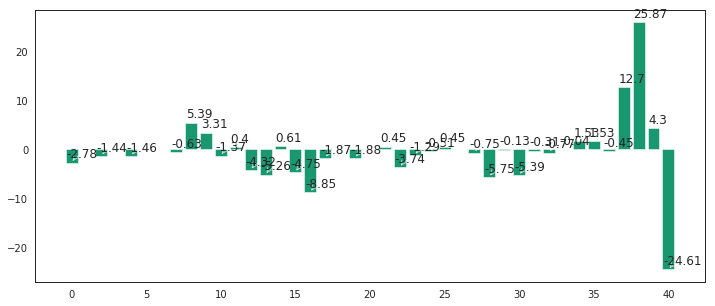

increase_per [-2.7799999999999998, 0.0, -1.4399999999999999, 0.0, -1.46, 0.0, 0.0, -0.63, 5.3899999999999997, 3.3100000000000001, -1.3700000000000001, 0.40000000000000002, -4.3200000000000003, -5.2599999999999998, 0.60999999999999999, -4.75, -8.8499999999999996, -1.8700000000000001, 0.0, -1.8799999999999999, 0.0, 0.45000000000000001, -3.7400000000000002, -1.29, -0.51000000000000001, 0.45000000000000001, 0.0, -0.75, -5.75, -0.13, -5.3899999999999997, -0.31, -0.77000000000000002, -0.040000000000000001, 1.53, 1.53, -0.45000000000000001, 12.699999999999999, 25.870000000000001, 4.2999999999999998, -24.609999999999999]


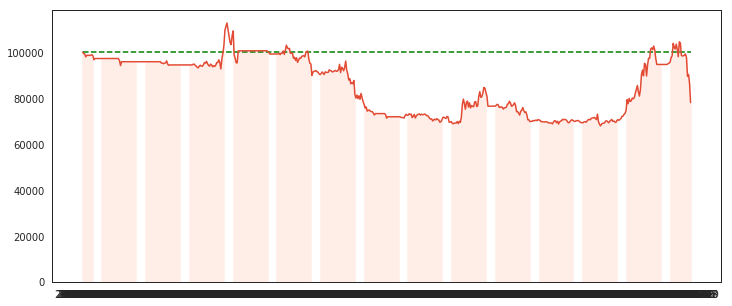

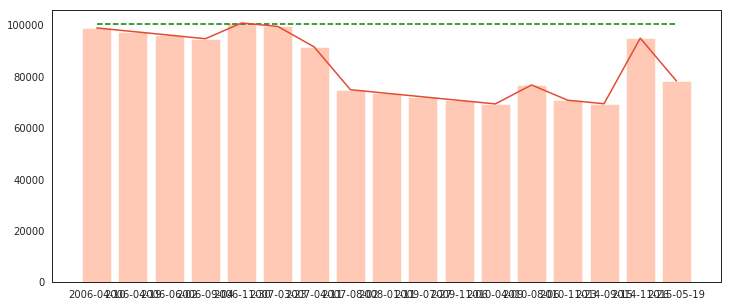

,symbol,buy_date,sell_date,buy_price,sell_price,shares,space,profit_rate,asset,market,drawndown
0,SZ#002033,2006-04-10,2006-04-13,2.01,1.8693,9900,0.0,-7.00,98607.07,strong,2.08
1,SZ#002033,2006-04-19,2006-04-25,2.09,1.9437,9500,0.0,-7.00,97217.22,strong,3.29
2,SZ#002033,2006-06-02,2006-06-07,2.59,2.4087,7700,0.0,-7.00,95821.21,strong,5.86
3,SZ#002033,2006-09-04,2006-09-14,3.22,2.9946,6200,0.0,-7.00,94423.73,strong,5.86
4,SZ#002033,2006-11-30,2007-02-06,3.32,4.0500,24800,0.0,21.99,100555.73,strong,15.40
5,SZ#002033,2007-03-23,2007-03-29,4.80,4.4640,4100,0.0,-7.00,99178.13,strong,15.40
6,SZ#002033,2007-04-11,2007-06-04,5.13,4.7709,8600,0.0,-7.00,91241.87,strong,20.27
7,SZ#002033,2007-08-02,2007-10-24,6.91,6.4263,11100,0.0,-7.00,74629.80,strong,34.04
8,SZ#002033,2008-01-11,2008-01-21,9.07,8.4351,2200,0.0,-7.00,73233.02,unknown,35.58
9,SZ#002033,2009-07-27,2009-07-29,4.58,4.2594,4300,0.0,-7.00,71854.44,strong,36.78


In [5]:
def demo():
    painter = AssetPainter()

    asset_file = 'account_asset_SZ#002033_20_240_Day_2019-05-30_V0.4.csv'
    painter.draw_month_profit_bars(report_dir+asset_file)
    painter.draw_audit_asset_bars(report_dir+asset_file)

    operation_file="operations_SZ#002033_20_240_Day_2019-05-30_V0.4.csv"
    painter.draw_operation_asset_bars(report_dir+operation_file)
